In [281]:
import numpy as np
import pandas as pd

## Check out the README file to understand the data structure

In [125]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('movielens/users.dat', sep='::',
header=None, names=unames, engine='python')
users

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


Note that ages and occupations are coded as integers indicating groups!

## The Melt Function

##### I used the meltdown function to reshape the dataframe from wide format to long format. This makes it easier to work with the data by creating one column for variable names and another for their corresponding values. It’s especially useful for visualization  and analysis when dealing with multiple variables.

In [8]:
pd.melt(users[:5], id_vars =['user_id'], value_vars =['gender'])

,user_id,variable,value
0,1,gender,F
1,2,gender,M
2,3,gender,M
3,4,gender,M
4,5,gender,M


In [10]:
pd.melt(users[:5], id_vars =['user_id'], value_vars =['gender', 'age'])

,user_id,variable,value
0,1,gender,F
1,2,gender,M
2,3,gender,M
3,4,gender,M
4,5,gender,M
5,1,age,1
6,2,age,56
7,3,age,25
8,4,age,45
9,5,age,25


In [12]:
pd.melt(users[:5], id_vars = ['user_id'], value_vars = ['gender', 'age'], var_name = 'demographic variable')

,user_id,demographic variable,value
0,1,gender,F
1,2,gender,M
2,3,gender,M
3,4,gender,M
4,5,gender,M
5,1,age,1
6,2,age,56
7,3,age,25
8,4,age,45
9,5,age,25


In [260]:
pd.melt(users[:5], id_vars = ['user_id'], value_vars = ['gender', 'age'], var_name = 'demographic variable', value_name = 'demographic value')

,user_id,demographic variable,demographic value
0,1,gender,F
1,2,gender,M
2,3,gender,M
3,4,gender,M
4,5,gender,M
5,1,age,1
6,2,age,56
7,3,age,25
8,4,age,45
9,5,age,25


## Next, I’m going to read the movie ratings data from the `ratings.dat` file and save it into a dataframe called `ratings`. I’ll include the following column names in the dataframe:
* user_id 
* movie_id
* rating
* timestamp

In [139]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('movielens/ratings.dat', sep='::',
header=None, names=rnames, engine='python')
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


##  Next, I’m going to read the movie data from the `movies.dat` file and save it into a dataframe called `movies`. I’ll include the following columns in the dataframe:
* movie_id
* title
* genres

In [265]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movielens/movies.dat', sep='::',
header=None, names=mnames, engine='python', encoding='latin')
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


### Compute mean ratings for a particular movie by sex and age. 

This is easier to do with the relevant data first merged together in a single table. Let's do that first!

## Merging the 3 tables into a single table

Using pandas’s merge function, we first merge ratings with users and then merge that result with the movies data. pandas infers which columns to use as the merge (or join) keys based on overlapping names: 

In [197]:
ratings_with_users = pd.merge(ratings, users, left_on = 'user_id', right_on = 'user_id')
ratings_with_users

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067
...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106
1000205,6040,1094,5,956704887,M,25,6,11106
1000206,6040,562,5,956704746,M,25,6,11106
1000207,6040,1096,4,956715648,M,25,6,11106


In [199]:
data = pd.merge(ratings_with_users, movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


In [201]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender')

In [203]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


We first filter down to movies that received at least 250 ratings (a completely arbitrary number); to do this, we group the data by title and use size() to get a Series of group sizes for each title:

In [206]:
ratings_by_title = data.groupby('title').size()

In [208]:
len(ratings_by_title)

3706

In [210]:
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

This shows the number of reviews each movie title received.

In [213]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [215]:
len(active_titles)

1216

In [217]:
active_titles[:10]

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)'],
      dtype='object', name='title')

The index of titles receiving at least 250 ratings can then be used to select rows from
mean_ratings:

In [220]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [222]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [224]:
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)
top_male_ratings[:10]

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


Suppose you wanted to find the movies that are most divisive between male and female viewers. One way is to add a column to mean_ratings containing the difference in means, then sort by that:

In [227]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [229]:
mean_ratings

gender,F,M,diff
title,,,
"'burbs, The (1989)",2.793478,2.962085,0.168607
10 Things I Hate About You (1999),3.646552,3.311966,-0.334586
101 Dalmatians (1961),3.791444,3.500000,-0.291444
101 Dalmatians (1996),3.240000,2.911215,-0.328785
12 Angry Men (1957),4.184397,4.328421,0.144024
...,...,...,...
Young Guns (1988),3.371795,3.425620,0.053825
Young Guns II (1990),2.934783,2.904025,-0.030758
Young Sherlock Holmes (1985),3.514706,3.363344,-0.151362


In [231]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [233]:
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


Reversing the order of the rows and again slicing off the top 10 rows, we get the movies preferred by men that women didn’t rate as highly:

In [236]:
sorted_by_diff[-10:]

gender,F,M,diff
title,,,
For a Few Dollars More (1965),3.409091,3.953795,0.544704
Caddyshack (1980),3.396135,3.969737,0.573602
Rocky III (1982),2.361702,2.943503,0.581801
"Hidden, The (1987)",3.137931,3.745098,0.607167
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
"Longest Day, The (1962)",3.411765,4.031447,0.619682
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359


## Finding the average ratings that each movie received

In [190]:
mean_ratings = data.pivot_table('rating', index='title', columns='occupation')
mean_ratings

occupation,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",3.800000,2.166667,NaN,4.000000,2.800000,4.000000,3.000000,3.000000,NaN,3.666667,...,NaN,1.000000,2.000000,NaN,NaN,5.000000,3.500000,NaN,3.500000,2.333333
'Night Mother (1986),2.615385,3.714286,3.000000,3.400000,3.666667,3.750000,3.500000,3.545455,NaN,NaN,...,5.000000,NaN,4.666667,3.500000,3.500000,3.000000,2.500000,4.50,NaN,3.000000
'Til There Was You (1997),2.666667,2.666667,2.500000,2.200000,3.333333,NaN,2.000000,2.857143,NaN,NaN,...,4.000000,3.000000,4.000000,2.600000,NaN,1.500000,4.000000,1.00,2.000000,2.333333
"'burbs, The (1989)",2.580645,2.958333,2.950000,2.833333,3.022222,2.916667,2.625000,2.615385,5.0,2.800000,...,2.000000,2.933333,NaN,3.250000,3.200000,2.833333,3.000000,3.10,3.400000,3.000000
...And Justice for All (1979),3.606061,3.650000,3.833333,2.875000,3.444444,3.750000,3.888889,3.848485,NaN,3.500000,...,3.833333,3.500000,4.000000,3.538462,4.000000,4.000000,4.090909,3.75,4.000000,3.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Zed & Two Noughts, A (1985)",3.142857,5.000000,3.000000,3.000000,4.500000,NaN,NaN,2.500000,NaN,3.000000,...,NaN,4.000000,NaN,NaN,3.000000,3.500000,NaN,NaN,NaN,3.600000
Zero Effect (1998),3.804348,3.727273,3.555556,3.666667,3.605263,3.750000,3.375000,3.521739,4.0,NaN,...,3.500000,4.181818,3.600000,3.750000,3.818182,4.000000,3.571429,1.00,4.428571,3.666667
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,3.000000


## Filtering out movies from the dataframe in the previous step that received more than 250 reviews.

In [70]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

occupation,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",2.580645,2.958333,2.950000,2.833333,3.022222,2.916667,2.625000,2.615385,5.00,2.800000,...,2.000000,2.933333,NaN,3.250000,3.200000,2.833333,3.000000,3.100000,3.400000,3.000000
10 Things I Hate About You (1999),3.337079,3.463415,3.285714,3.478261,3.391026,3.769231,3.428571,3.558140,4.00,3.916667,...,3.200000,3.250000,4.000000,3.388889,3.076923,3.375000,3.510638,3.571429,3.090909,3.052632
101 Dalmatians (1961),3.546667,3.627451,3.625000,3.736842,3.423529,3.666667,3.736842,3.716981,4.00,3.916667,...,4.444444,3.454545,3.142857,3.478261,4.111111,3.521739,3.641026,3.625000,2.857143,3.709677
101 Dalmatians (1996),3.050847,3.117647,2.944444,3.166667,2.595238,3.333333,3.437500,3.190476,3.00,2.909091,...,3.200000,2.916667,3.666667,3.071429,4.000000,3.375000,3.352941,3.400000,3.200000,2.571429
12 Angry Men (1957),4.318841,4.148148,4.333333,4.400000,4.115385,4.400000,4.516129,4.230769,5.00,4.400000,...,4.409091,4.380952,4.368421,4.333333,4.571429,4.366667,4.333333,4.625000,4.428571,4.230769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns (1988),3.487500,3.096774,3.392857,3.500000,3.382353,3.736842,3.615385,3.375000,3.25,3.166667,...,2.928571,3.866667,3.000000,3.394737,4.000000,3.360000,3.326087,3.818182,3.875000,3.121212
Young Guns II (1990),2.901639,2.600000,3.227273,3.000000,2.881356,3.000000,3.666667,2.789474,NaN,2.500000,...,2.250000,3.266667,NaN,2.818182,2.833333,2.846154,2.931034,3.000000,3.500000,2.600000
Young Sherlock Holmes (1985),3.418605,3.230769,3.680000,4.000000,3.392157,3.153846,3.400000,3.413043,3.00,3.500000,...,3.200000,3.400000,3.000000,3.333333,4.000000,3.277778,3.379310,3.400000,3.571429,3.120000


## The top 10 films among: 
* College/grad students
* Farmers

In [73]:
mean_ratings.sort_values (by = 4, ascending = False)[:10]

occupation,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
title,,,,,,,,,,,,,,,,,,,,,
"Shawshank Redemption, The (1994)",4.547170,4.469767,4.452830,4.492063,4.683582,4.512195,4.711340,4.576419,4.333333,4.400000,...,4.454545,4.528986,4.588235,4.696429,4.537037,4.432990,4.620253,4.600000,4.500000,4.302752
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.671642,4.410714,4.575758,4.321429,4.675676,4.625000,4.181818,4.377778,5.000000,3.666667,...,4.250000,4.100000,4.533333,4.538462,5.000000,4.571429,4.700000,3.857143,4.555556,4.585366
"Usual Suspects, The (1995)",4.472477,4.561644,4.466667,4.538462,4.649123,4.578947,4.483871,4.539267,4.800000,4.266667,...,4.227273,4.532787,4.444444,4.650485,4.612245,4.400000,4.462185,4.095238,4.461538,4.350515
"Close Shave, A (1995)",4.525000,4.518519,4.722222,4.428571,4.595506,4.222222,4.583333,4.375000,5.000000,4.750000,...,4.571429,4.578125,5.000000,4.739130,4.520000,4.375000,4.571429,5.000000,4.625000,4.250000
"Godfather, The (1972)",4.480159,4.423469,4.500000,4.612903,4.556364,4.595238,4.602273,4.607914,4.500000,4.000000,...,4.646154,4.413534,4.450000,4.581818,4.530303,4.612245,4.418605,4.535714,4.500000,4.629310
It Happened One Night (1934),4.180000,4.269231,4.307692,4.437500,4.545455,4.500000,4.142857,4.187500,5.000000,4.428571,...,4.111111,4.352941,4.538462,4.571429,4.000000,4.125000,4.227273,3.666667,4.000000,4.228571
"Treasure of the Sierra Madre, The (1948)",4.245902,4.260870,4.277778,4.444444,4.521739,4.333333,4.055556,4.147541,3.000000,4.000000,...,4.166667,4.222222,4.434783,4.466667,3.909091,4.391304,4.640000,4.714286,4.000000,4.314286
"Wrong Trousers, The (1993)",4.456311,4.535211,4.517241,4.571429,4.512195,4.307692,4.333333,4.677966,4.500000,5.000000,...,4.250000,4.545455,5.000000,4.617647,4.555556,4.454545,4.472527,4.800000,4.416667,4.435484
One Flew Over the Cuckoo's Nest (1975),4.235897,4.356021,4.488372,4.355932,4.495000,4.545455,4.513889,4.372449,3.666667,4.217391,...,4.589744,4.327103,4.285714,4.555556,4.446809,4.430380,4.376147,4.409091,4.200000,4.416667


In [75]:
mean_ratings.sort_values (by = 8, ascending = False)[:10]

occupation,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",2.580645,2.958333,2.950000,2.833333,3.022222,2.916667,2.625000,2.615385,5.0,2.800000,...,2.000000,2.933333,NaN,3.250000,3.200000,2.833333,3.000000,3.100000,3.400000,3.000000
"Grand Day Out, A (1992)",4.381818,4.405405,4.394737,4.363636,4.275862,4.285714,4.181818,4.400000,5.0,4.833333,...,4.555556,4.307692,2.500000,4.625000,4.200000,4.571429,4.428571,4.666667,4.285714,4.151515
"Green Mile, The (1999)",4.128571,4.128713,4.139535,4.305556,4.086957,4.034483,4.312500,4.211382,5.0,4.400000,...,3.916667,4.359375,4.200000,4.223881,4.275862,4.173913,4.189474,4.250000,4.071429,3.698413
"Big Chill, The (1983)",3.846847,3.975000,3.604651,3.935484,3.500000,3.705882,4.189189,3.840000,5.0,3.909091,...,4.275862,3.810811,4.350000,4.200000,4.000000,3.897959,3.698113,4.000000,4.100000,3.673469
Hamlet (1996),3.897959,4.032258,3.680000,3.933333,3.876543,4.333333,4.500000,3.500000,5.0,4.000000,...,3.166667,4.125000,4.333333,4.058824,4.300000,4.250000,4.038462,3.500000,4.200000,4.040000
Better Off Dead... (1985),3.888889,3.750000,4.068966,4.000000,4.038462,4.000000,3.538462,3.906977,5.0,3.666667,...,4.500000,3.791667,NaN,4.086957,4.153846,3.833333,3.880952,3.500000,4.000000,3.608696
Harold and Maude (1971),4.037975,3.954545,4.085106,4.074074,4.317460,4.444444,4.111111,4.202703,5.0,4.250000,...,4.500000,4.093023,4.357143,4.225806,4.269231,4.309524,4.289474,3.750000,4.083333,4.222222
Hercules (1997),3.296875,3.325000,3.240000,3.571429,3.282051,3.545455,3.500000,3.285714,5.0,4.000000,...,3.000000,2.680000,2.500000,3.083333,3.333333,3.615385,3.441176,2.400000,3.500000,3.076923
His Girl Friday (1940),4.327273,4.283019,4.157895,4.368421,4.103448,4.000000,4.125000,4.147059,5.0,3.857143,...,4.600000,4.400000,4.000000,4.562500,4.166667,3.818182,4.176471,4.400000,4.285714,4.375000


## Replacing the column names of data by changing the string to CAPITAL CASE

In [78]:
data.columns

Index(['user_id', 'movie_id', 'rating', 'timestamp', 'gender', 'age',
       'occupation', 'zip', 'title', 'genres'],
      dtype='object')

In [80]:
data.columns = data.columns.str.upper()
data

,USER_ID,MOVIE_ID,RATING,TIMESTAMP,GENDER,AGE,OCCUPATION,ZIP,TITLE,GENRES
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


## Creating a new dataframe containing only the ratings from male reviewers between 18 and 34 y/o

In [83]:
g = data[(data['GENDER'] == 'M') & (data['AGE'] >= 18) & (data['AGE'] <= 25)]
g

,USER_ID,MOVIE_ID,RATING,TIMESTAMP,GENDER,AGE,OCCUPATION,ZIP,TITLE,GENRES
182,3,3421,4,978298147,M,25,15,55117,Animal House (1978),Comedy
183,3,1641,2,978298430,M,25,15,55117,"Full Monty, The (1997)",Comedy
184,3,648,3,978297867,M,25,15,55117,Mission: Impossible (1996),Action|Adventure|Mystery
185,3,1394,4,978298147,M,25,15,55117,Raising Arizona (1987),Comedy
186,3,3534,3,978297068,M,25,15,55117,28 Days (2000),Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


## Creating a dataframe that shows for each gender, the average age of the corresponding raters and the maximum rating provided by any rater in the dataset. Then, naming the columns 'average age' and 'max rating' 

In [86]:
p = data.groupby('GENDER').agg({
'AGE': 'mean',
'RATING': 'max'
})

p = p.rename(columns={'AGE': 'average age', 'RATING': 'max rating'})
p

,average age,max rating
GENDER,,
F,29.803855,5
M,29.716885,5


## Examining when the reviews were posted in this dataset

In [109]:
data

,USER_ID,MOVIE_ID,RATING,TIMESTAMP,GENDER,AGE,OCCUPATION,ZIP,TITLE,GENRES
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


## Creating a plot to visualize how the mean rating (mean over all movies) change with rater age.  Also showing the 95% confidence interval for the mean rating in the plot.  

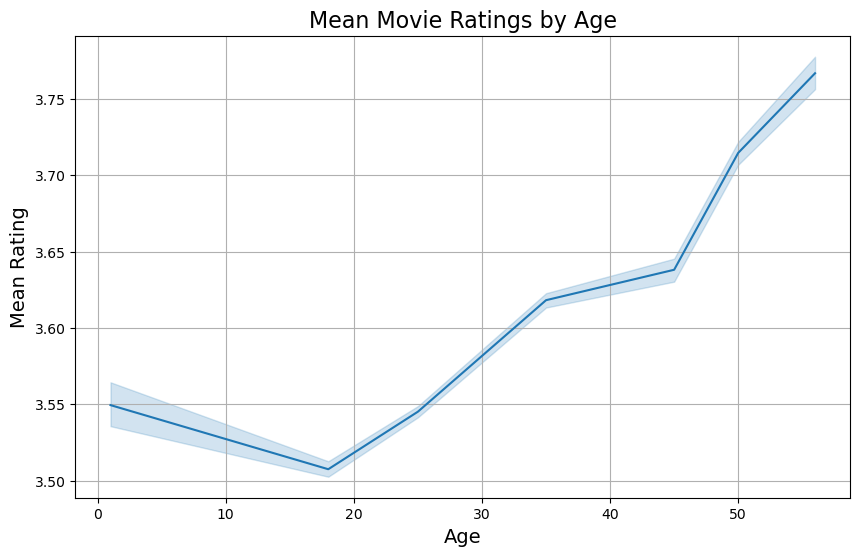

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot using seaborn's lineplot with the updated `errorbar` parameter
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='AGE', y='RATING', errorbar=('ci', 95))

# Add labels and title
plt.title("Mean Movie Ratings by Age", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Mean Rating", fontsize=14)
plt.grid(True)
plt.show()
